<a href="https://colab.research.google.com/github/cmartinsvi/Python_21.1/blob/main/Vitoria_Daphne_Projeto1_PythonUERJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega: 21/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20º \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



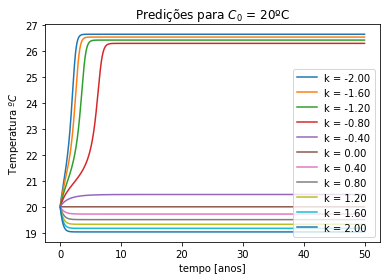

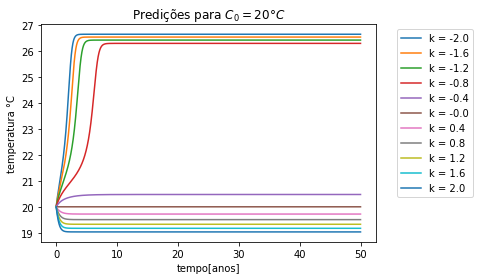

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def EDO(t, C):
  'definindo a EDO a ser resolvida' 
  return (1/10)*(C - 20)*(22 - C)*(C - 26) - k


def RK4(f,t, C0):
  'Função que ira resolver a nossa EDO pelo método Runge-Kuta de quarta ordem.'
  C=[]
  C.append(C0)     
  dt = t[1]-t[0]
  for i in range(len(t)-1):
      K_1 = f(t, C[i])
      K_2 = f(t + dt/2, C[i] + (K_1*dt)/2)
      K_3 = f(t + dt/2, C[i] + (K_2*dt)/2)
      K_4 = f(t + dt, C[i] + K_3*dt)
      C_i = C[i] + (dt/6)*(K_1 + 2*K_2 + 2*K_3 + K_4)
      C.append(C_i)
  return t, C

#Definindo as variaveis da nossa EDO a serem aplicadas

t = np.arange(0,50.01, 0.01)
C0 = 20
K_L = np.arange(-2,2.4,0.4)

# Plotanto o grafico de cada uma das soluções:

plt.title('Predições para $C_0 = 20 °C$')  
plt.xlabel(f'tempo[anos]')
plt.ylabel(f'temperatura °C')

'''
Criando um Loop para que seja plotada a solução para cada valor de k determinado, 
e para que ao final do código não seja preciso chamar a função RK4 já que ela 
já está sendo chamada no loop
'''

for k in K_L:
  x_k,y_k = RK4(EDO, t, C0)
  plt.plot(x_k, y_k, label='k = {}'.format(round(k,2)))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')



## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_", isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico $T_{fin}$ vs. $k$ é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



Na linha que você faz o cálculo da temperatura de equilíbrio T_fin, você pode verificar a variação ao invés da igualdade para ter maior robustez. Por exemplo:

if abs(T2 - T1) < 0.01:

Na parte do diagrama de bifurcação você vai precisar resolver a eq. diferencial para um maior número de configurações. Pode fazer algo do tipo:

t = np.linspace(0,50,5001)
C0 = np.linspace(19,30,51)
K_L = np.linspace(-2, 2,51)

No seu código atual isso já deve gerar um diagrama de bifurcação completo para um valor de C0.

Você ainda pode visualizar o diagrama para todas as configurações ao mesmo tempo. É possível fazer isso se você armazenar todos os k_fin, T_fin e C0 para todas as soluções ao invés de fazer o plot para cada um e a partir disso utilizar o parâmetro c do plt.scatter da seguinte forma:

plt.scatter(k_fin, T_fin, c=C0, cmap='rainbow')

In [2]:
%%writefile modulo_ViDaph.py
import math
import numpy as np
import matplotlib.pyplot as plt

def EDO(t, C, k):
   'definindo a EDO a ser resolvida' 
   return (1/10)*(C - 20)*(22 - C)*(C - 26) - k

def RK4(f,t, C0, K_L):
  '''Função que ira resolver a nossa EDO pelo método Runge-Kuta de quarta ordem.
  Mas nessse caso como queremos a solução para diferentes C0 também iremos votar dela 
  uma lista. '''
  lista_temp = {}
  for k in K_L:
    C=[]
    C.append(C0)     
    dt = t[1]-t[0]
    for i in range(len(t)-1):
        K_1 = f(t, C[i], k)
        K_2 = f(t + dt/2, C[i] + (K_1*dt)/2, k)
        K_3 = f(t + dt/2, C[i] + (K_2*dt)/2, k)
        K_4 = f(t + dt, C[i] + K_3*dt, k)
        C_i = C[i] + (dt/6)*(K_1 + 2*K_2 + 2*K_3 + K_4)
        C.append(C_i)
    lista_temp[k] = C
  return lista_temp

#calculo 2

def T_final(C0, t, K_L):
  '''Função que detnmina o T_fin(temperatura de equilibrio) para cada C0 e vai adicionando-os
  a uma lista para após isso plotar o diagrama de bifuncação delas.'''
  for temperatura in C0:
     lista_temp = RK4(EDO, t, temperatura, K_L)
     T_fin = []
     k_fin = []
     t_anos = []
     
     for k in lista_temp:
          for i in range(len(t)-1):
            if abs((lista_temp[k][i+1]) - (lista_temp[k][i])) < 0.01:
              print("T_fin = {}°C , com k = {} e leva um tempo = {} anos para atingi-lo".format(round(lista_temp[k][i],2),round(k,2),round(t[i],2))) 
              T_fin.append(lista_temp[k][i])
              k_fin.append(k)
              t_anos.append(t)
              break
     plt.scatter(k_fin,T_fin, cmap = 'rainbow',label ='{}'.format(round(temperatura,2)))
  plt.title('Diagrama de bifurcação para os $C_0$')
  plt.xlabel(f"k")
  plt.ylabel(f"Temperatura (°C)")
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.show()
   

def grafico_EDO(C0, K_L, t):
    '''Definindo uma função para plotar o grafico de soluções das EDO's com seus C0
    e k variando'''
    for C in C0:
      plt.title('Predições para $C_0$ = {} °C'.format(round(C,2)))
      plt.xlabel(f'tempo[anos]')
      plt.ylabel(f'temperatura °C')

      lista_temp = RK4(EDO, t, C, K_L)
      for k in K_L:
          plt.plot(t, lista_temp[k], label='k = {}'.format(round(k,2)))

      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.show()


Writing modulo_ViDaph.py


T_fin = 26.37°C , com k = -2.0 e leva um tempo = 3.17 anos para atingi-lo
T_fin = 26.22°C , com k = -1.6 e leva um tempo = 3.77 anos para atingi-lo
T_fin = 20.2°C , com k = -1.2 e leva um tempo = 0.7 anos para atingi-lo
T_fin = 19.85°C , com k = -0.8 e leva um tempo = 0.51 anos para atingi-lo
T_fin = 19.61°C , com k = -0.4 e leva um tempo = 0.39 anos para atingi-lo
T_fin = 19.41°C , com k = -0.0 e leva um tempo = 0.28 anos para atingi-lo
T_fin = 19.25°C , com k = 0.4 e leva um tempo = 0.19 anos para atingi-lo
T_fin = 19.1°C , com k = 0.8 e leva um tempo = 0.09 anos para atingi-lo
T_fin = 19.0°C , com k = 1.2 e leva um tempo = 0.0 anos para atingi-lo
T_fin = 19.0°C , com k = 1.6 e leva um tempo = 0.0 anos para atingi-lo
T_fin = 19.0°C , com k = 2.0 e leva um tempo = 0.0 anos para atingi-lo
T_fin = 26.36°C , com k = -2.0 e leva um tempo = 3.11 anos para atingi-lo
T_fin = 26.23°C , com k = -1.6 e leva um tempo = 3.71 anos para atingi-lo
T_fin = 20.19°C , com k = -1.2 e leva um tempo = 0.6

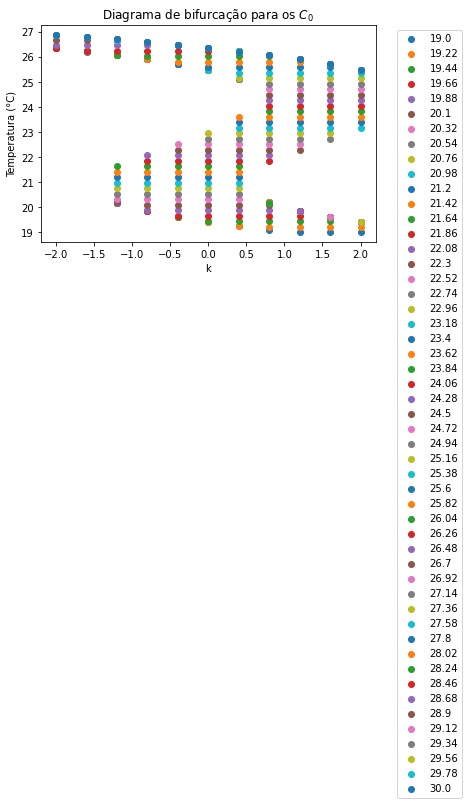

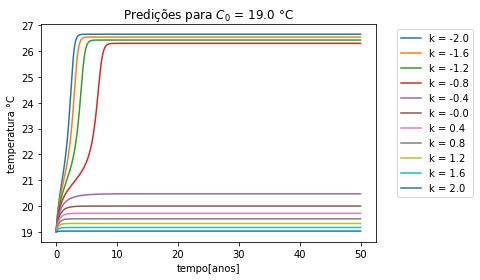

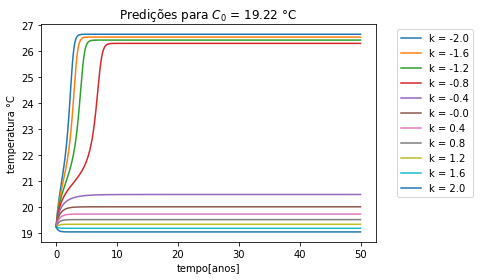

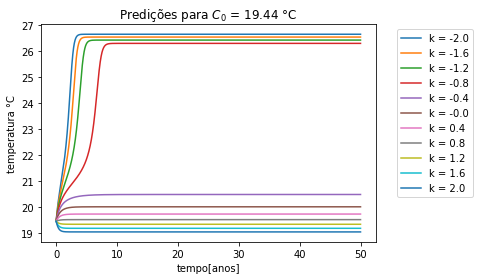

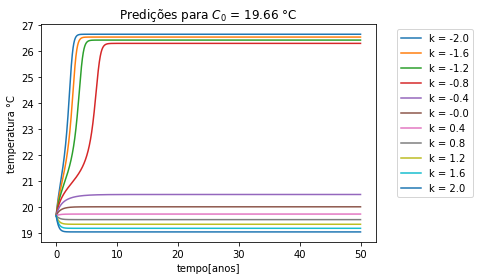

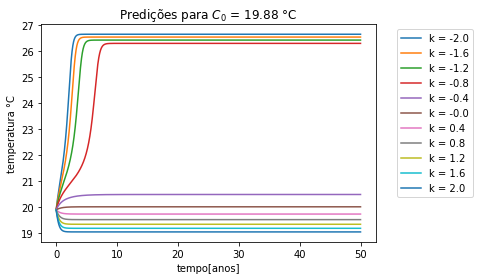

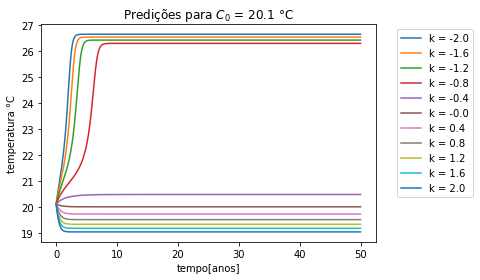

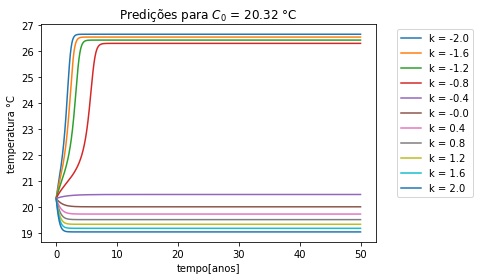

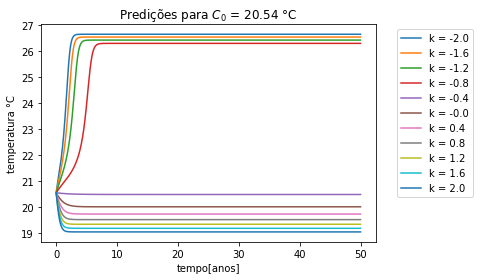

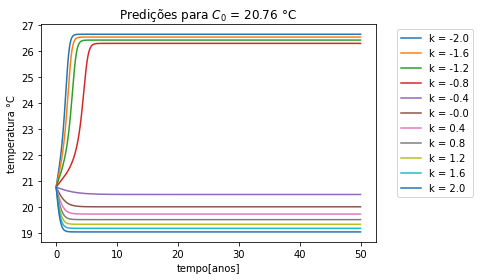

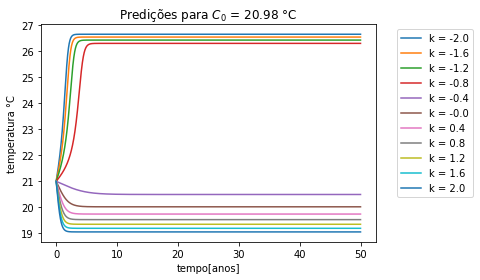

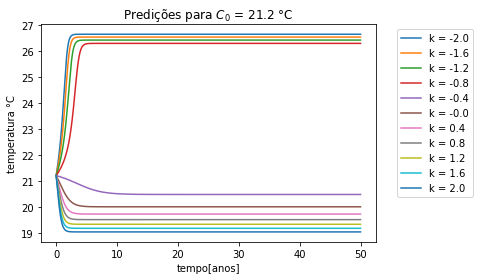

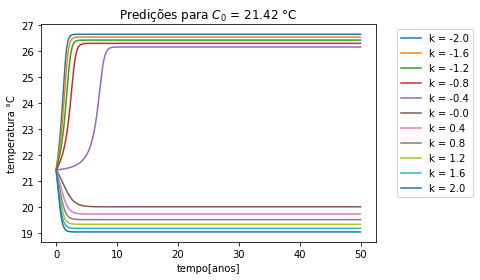

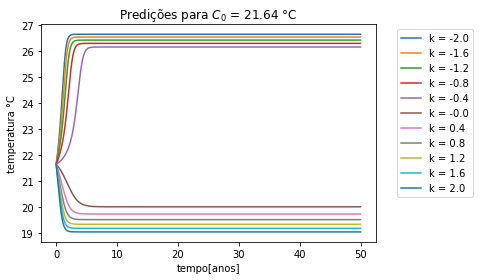

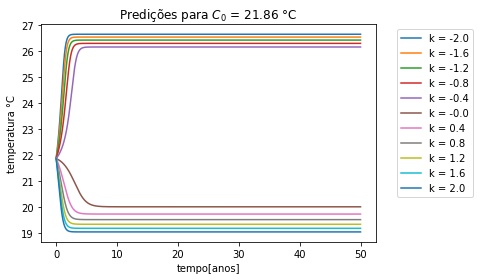

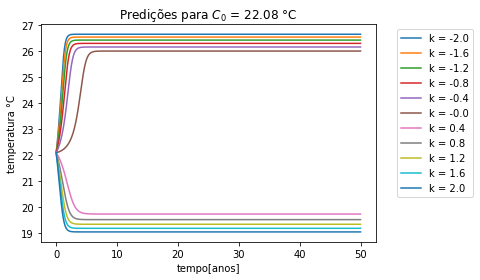

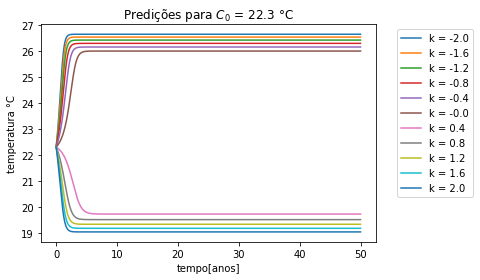

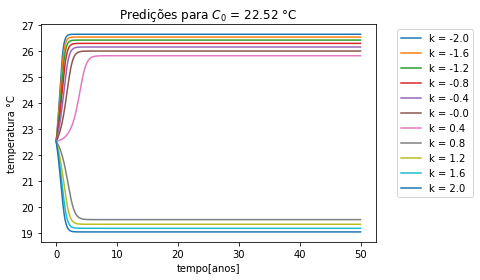

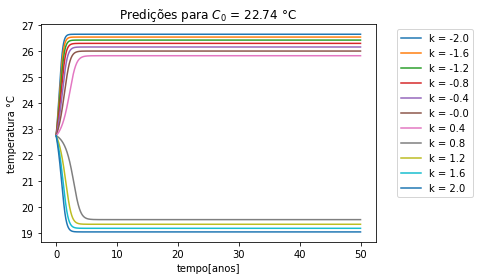

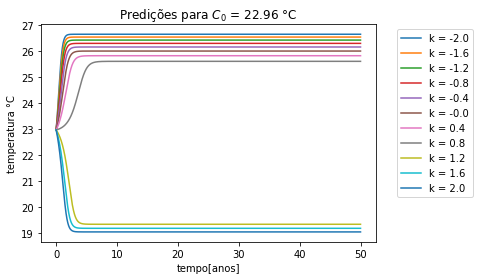

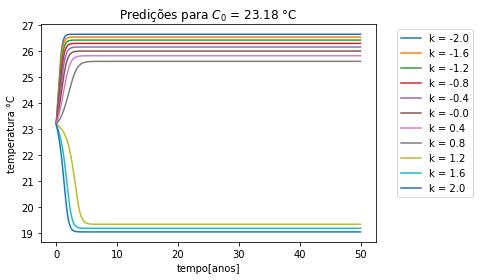

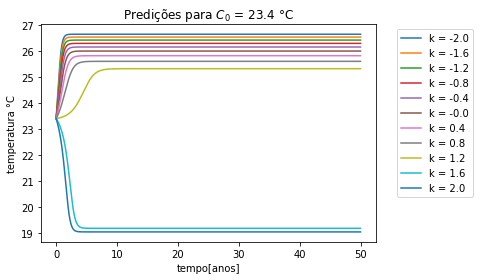

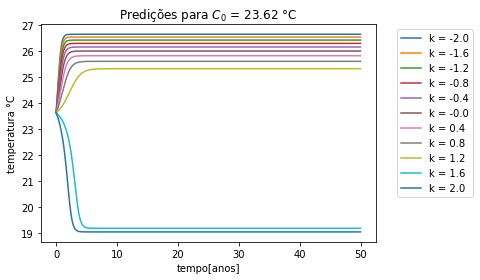

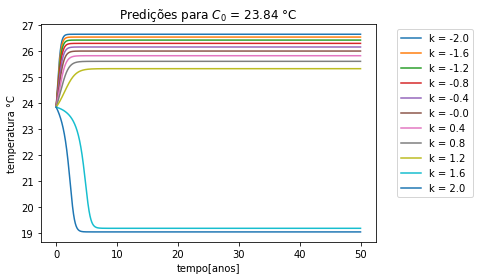

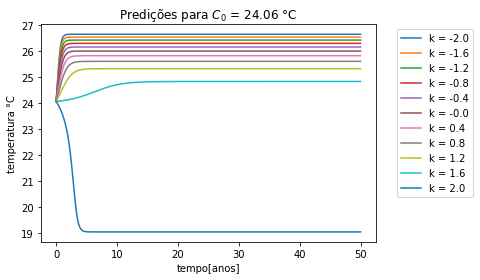

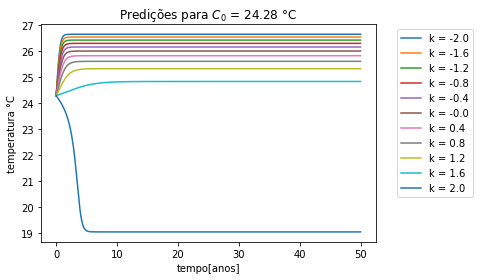

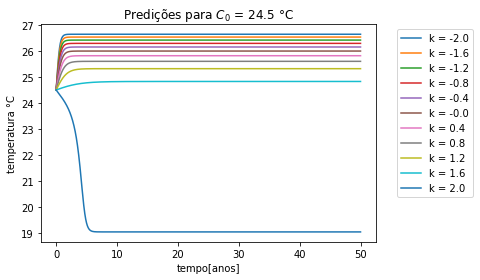

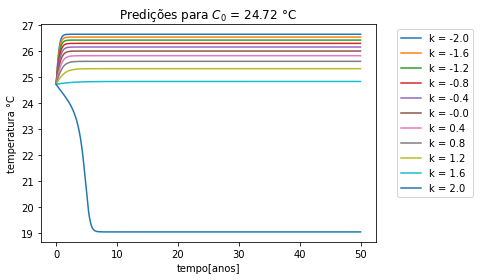

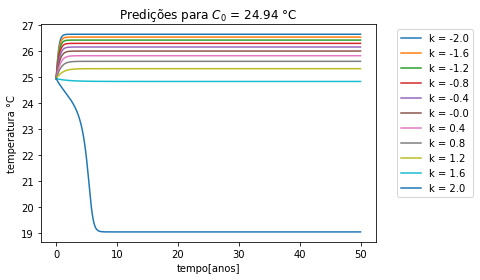

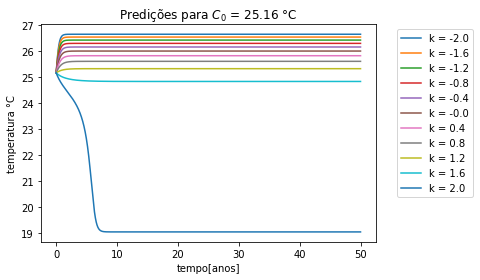

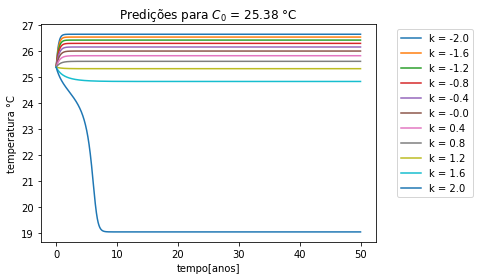

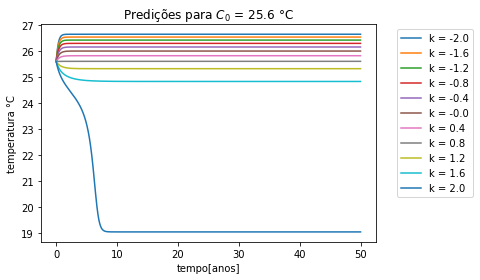

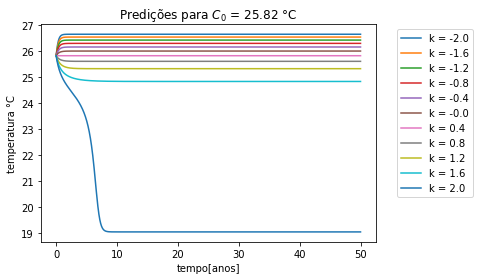

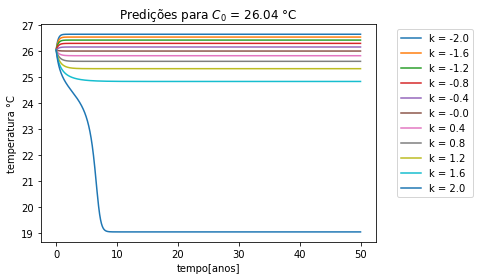

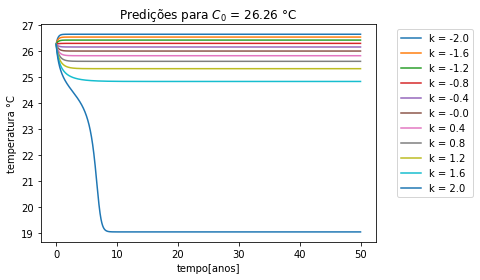

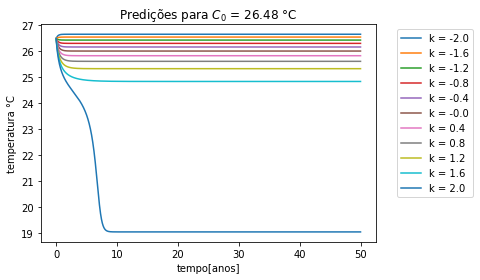

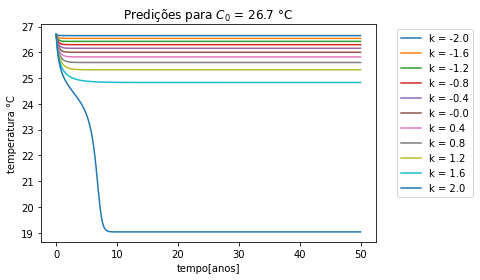

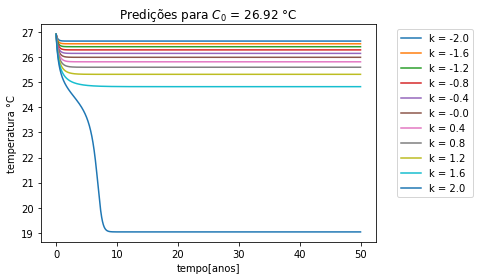

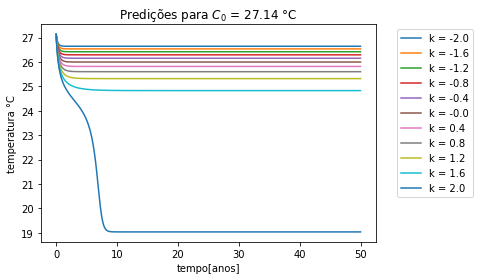

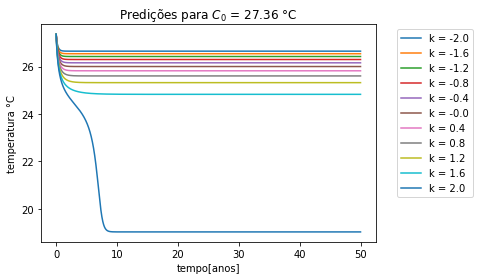

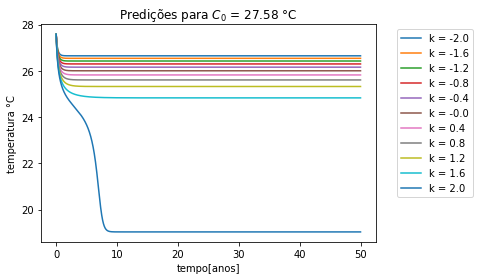

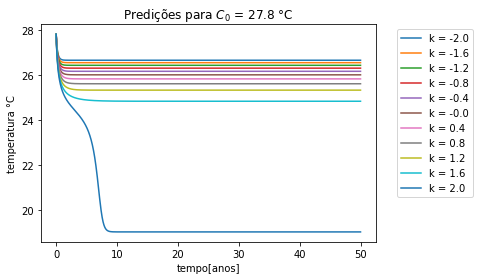

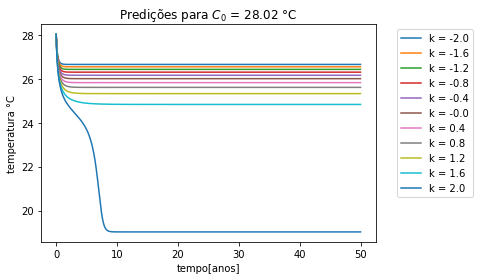

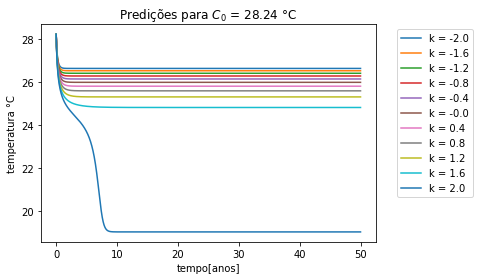

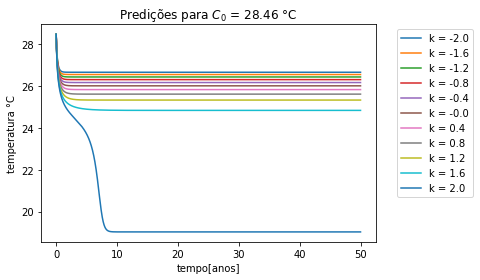

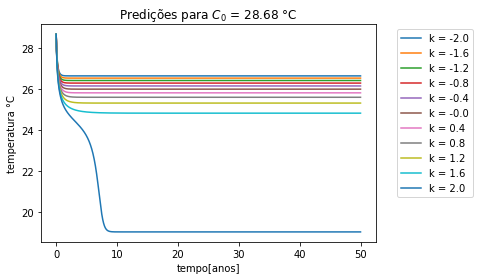

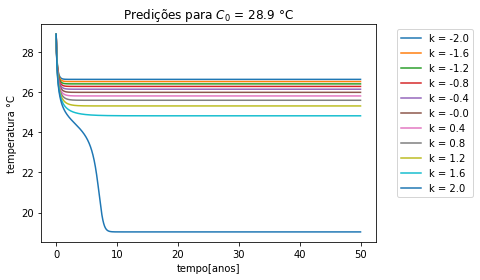

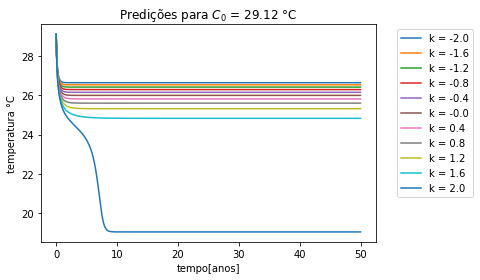

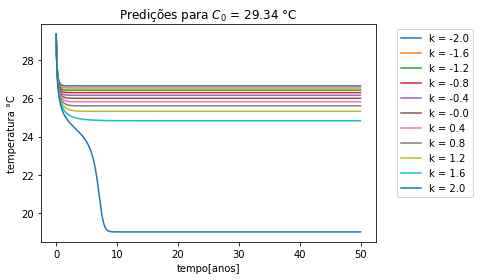

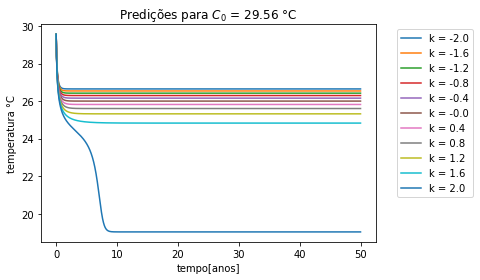

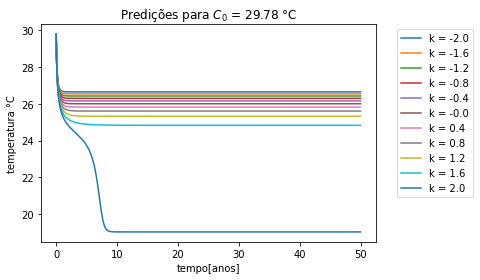

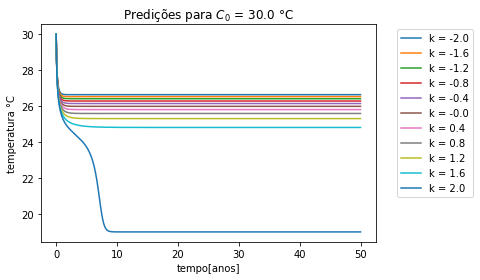

In [26]:
import modulo_ViDaph as VD
import numpy as np

C0 = np.linspace(19,30,51) 
t = np.arange(0,50.01, 0.01)
K_L = np.arange(-2,2.4,0.4)

VD.T_final(C0, t, K_L)
VD.grafico_EDO(C0, K_L, t)

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22ºC$ ?  e se este valor flutuar em 0.1º para cima?



**Respostas:**
1. As temperaturas de estabilização para todas as temperaturas icniciais do diagrama de bifurcação num geral então convergindo pra valores entre 26°C e 27°C
2. As temperaturas de estabilização iram variar entre dois valores diferentes para algumas temperaturas iniciais ela ira ficar entre 26°C e 23°C e para outras fica entre 20°C e 18°C.
3. Quando C0 = 22°C e k=0.0 a temperatura se mantem estavel em 22°C e se variarmos o C0 para 22.1°C a temperatura de equlibrio passa a ser em torno dos 26°C



4. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21ºC$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?

a) 21°C


b) A tendência da temperatura é subir.


c) -0.6


No handles with labels found to put in legend.


No momento de transição entre os k's a temperatura é de 21.0°C


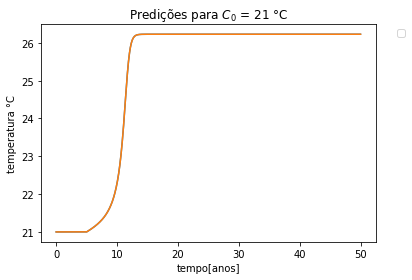

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def EDO(t, C, k):
   'definindo a EDO a ser resolvida' 
   return (1/10)*(C - 20)*(22 - C)*(C - 26) - k

def RK4(f,t, C0, K_L):

  '''Função que ira resolver a nossa EDO pelo método Runge-Kuta de quarta ordem.
  E iremos votar dela uma lista. '''

  lista_temp = {}
  for w in range(len(k)-1):
    C=[]
    C.append(C0)     
    dt = t[1]-t[0]
    for i in range(len(t)-1):
        K_1 = f(t, C[i], k[w])
        K_2 = f(t + dt/2, C[i] + (K_1*dt)/2, k[w])
        K_3 = f(t + dt/2, C[i] + (K_2*dt)/2, k[w])
        K_4 = f(t + dt, C[i] + K_3*dt, k[w])
        C_i = C[i] + (dt/6)*(K_1 + 2*K_2 + 2*K_3 + K_4)
        C.append(C_i)
        K = k[w]
        if t[i] == 5:
          print("No momento de transição entre os k's a temperatura é de {}°C".format(C[i]))
          k[w] = k[w+1]
    lista_temp[K] = C
  return lista_temp
   

def grafico_EDO(C0, K_L, t):

    '''Definindo uma função para plotar o grafico de soluções das EDO's com seu C0
    e o k variando'''

    for C in C0:
      plt.title('Predições para $C_0$ = {} °C'.format(round(C,2)))
      plt.xlabel(f'tempo[anos]')
      plt.ylabel(f'temperatura °C')

      lista_temp = RK4(EDO, t, C, K_L)
      for k in K_L:
          plt.plot(t, lista_temp[k])

      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.show()

  
  
t = np.arange(0, 50.01, 0.01) 
C0 = [21] 
k = [-0.5,-0.6]

grafico_EDO(C0, k, t)

